# Simple Image preprocessing & Simple CNN model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

## Explore Data

### reference https://www.kaggle.com/code/ryanholbrook/create-your-first-submission/notebook

In [2]:
import tensorflow as tf
import numpy as np
import os
import glob

ROOT_DIR = '/kaggle/input/tpu-getting-started'
DATA_SIZE_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*'))

DATA_DIRS = []
for DATA_SIZE_DIR in DATA_SIZE_DIRS:
    _data_dir = glob.glob(DATA_SIZE_DIR + '/train/*')[0]
    DATA_DIRS += [_data_dir]

In [3]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose'] 

In [4]:
def tfrecord_func(example):
    TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'class': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    
    image = tf.cast(tf.image.decode_jpeg(example['image'], channels=3), tf.int32)
    label = tf.cast(example['class'], tf.int32)
    return image, label

dataset = tf.data.TFRecordDataset(DATA_DIRS)
dataset = dataset.map(tfrecord_func)

2022-08-30 08:25:35.587041: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
dataset_iter = dataset.as_numpy_iterator()

2022-08-30 08:25:35.812937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


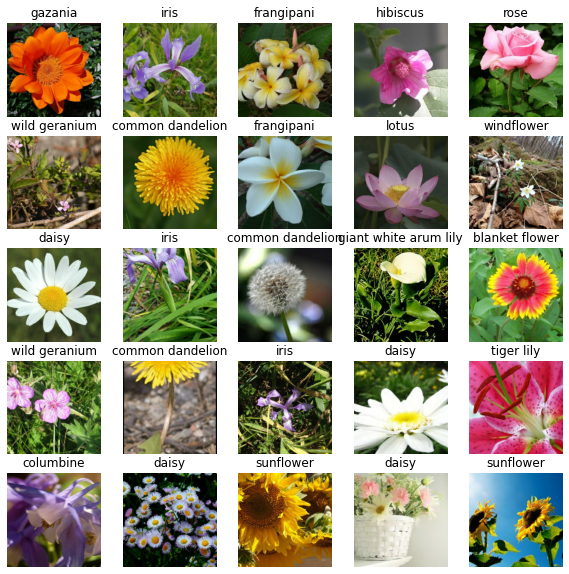

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    image, label = next(dataset_iter)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(CLASSES[label])
    plt.axis('off')
plt.show()

## Load Data

In [7]:
TRAIN_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*/train/*'))
VAL_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*/val/*'))
TEST_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*/test/*'))

In [8]:
# def load_dataset(dirs, train):
#     dataset = tf.data.TFRecordDataset(dirs, num_parallel_reads=tf.data.AUTOTUNE)
#     options = tf.data.Options()
#     options.experimental_deterministic = False
#     dataset = dataset.with_options(options)
#     dataset = dataset.map()